# IMPORTING SOME BASIC LIBRARIES 


In [1]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,5)

import warnings 
warnings.filterwarnings('ignore')

import statsmodels 
import statsmodels.api as sm 

# IMPORT THE DATA

In [2]:
test = pd.read_csv(r'test.csv')
train = pd.read_csv(r'train.csv')

In [3]:
train.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22


In [4]:
# NULL VALUE COUNT ON TRAIN SET
round((train.isnull().sum()/train.shape[0])*100,2)

ID                       0.00
AGE                      0.40
EDUCATION                0.00
OCC                      0.00
PINCODE                  0.04
PROD_CATEGORY            0.00
INCOME_SEGMENT           0.00
PROSPERITY_INDEX_BAND    0.00
QUALITY_SCORE_BAND       0.00
ISSUANCE_MONTH           0.00
dtype: float64

In [5]:
# NULL VALUE COUNT ON TEST SET
round((test.isnull().sum()/train.shape[0])*100,2)

ID                       0.0
AGE                      0.0
EDUCATION                0.0
OCC                      0.0
PINCODE                  0.0
INCOME_SEGMENT           0.0
PROSPERITY_INDEX_BAND    0.0
QUALITY_SCORE_BAND       0.0
ISSUANCE_MONTH           0.0
dtype: float64

* There are some null values presents in columns like 'AGE' ,'PINCODE' 

# CLEANING THE DATA

In [6]:
# replacing age column with mean 
train['AGE'] = train['AGE'].replace(np.nan,round(train.AGE.mean()))
# replacing -99 to mode value for column INCOME_SEGMENT 
train.INCOME_SEGMENT = train.INCOME_SEGMENT.replace(-99,train.INCOME_SEGMENT.mode()[0])
# dropping rows where pin code is missing
train = train[~train.PINCODE.isnull()]
# replacing -99 to mode value for column INCOME_SEGMENT in test data
test.INCOME_SEGMENT = test.INCOME_SEGMENT.replace(-99,test.INCOME_SEGMENT.mode()[0])

In [7]:
train.isnull().sum()

ID                       0
AGE                      0
EDUCATION                0
OCC                      0
PINCODE                  0
PROD_CATEGORY            0
INCOME_SEGMENT           0
PROSPERITY_INDEX_BAND    0
QUALITY_SCORE_BAND       0
ISSUANCE_MONTH           0
dtype: int64

* successfully cleaned 

In [8]:
# lest check the shape now 
print(train.shape)
print(test.shape)

(4498, 10)
(500, 9)


# LET'S DO SOME BASIC EXPLORATORY DATA ANALYSIS

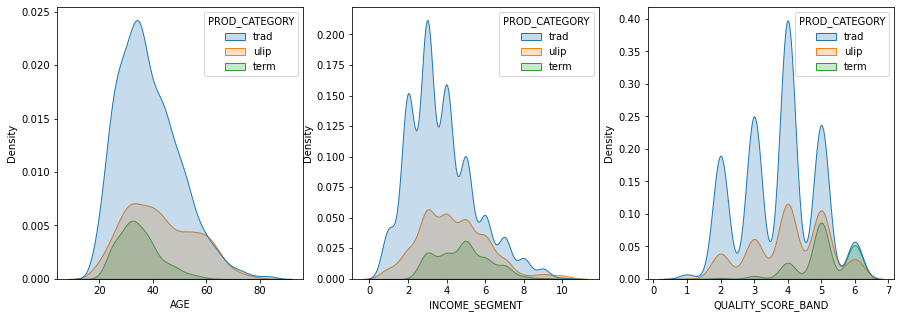

In [9]:
categorical_variables = ['AGE','INCOME_SEGMENT','QUALITY_SCORE_BAND']
fig, ax = plt.subplots(1,3, figsize = (15,5))
counter=0
for i in categorical_variables:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.kdeplot(x=i,ax=ax[trace_y],data=train,hue='PROD_CATEGORY',shade=True)
    plt.subplots_adjust(hspace=0.5)
    counter += 1
plt.show()

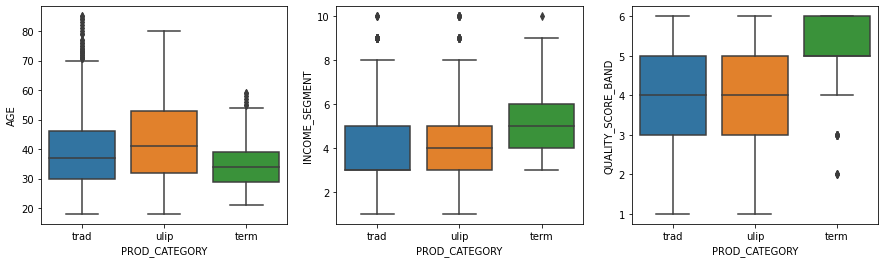

In [10]:
categorical_variables = ['AGE','INCOME_SEGMENT','QUALITY_SCORE_BAND']
fig, ax = plt.subplots(1,3, figsize = (15,4))
counter=0
for i in categorical_variables:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(y=i,x='PROD_CATEGORY',ax=ax[trace_y],data=train)
    plt.subplots_adjust(hspace=0.5)
    counter += 1
plt.show()

* From the above two plots attributes like AGE and INCOME_SEGMENT seem insightful.
* Also the outliers are in a continuous manner so it's okay to leave them as it is.

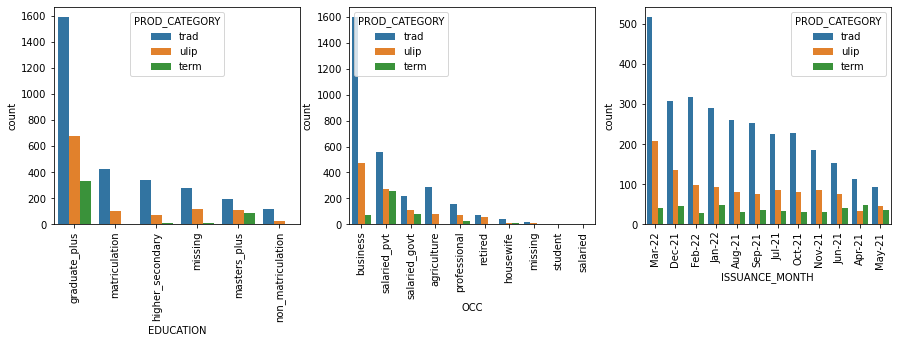

In [11]:
categorical_variables = ['EDUCATION','OCC','ISSUANCE_MONTH']
fig, ax = plt.subplots(1,3, figsize = (15,4))
counter=0
for i in categorical_variables:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.countplot(x=i,ax=ax[ trace_y],hue='PROD_CATEGORY',data=train,order=train[i].value_counts().index)
    plt.subplots_adjust(hspace=0.9)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    counter += 1
plt.show()

* There are some insights comes from attribute 'ISSUANCE_MONTH' like. 
1. peoples are more like to buy the insurance in months of march,Dec,Feb,Jan.
2. In month of April clients are more tends to buy trad,term insurance. 


# *LETS EXTRACT SOME ATTRIBUTES FROM INTERNET AND SEE IS THERE ANY IMPACT OR NOT*

## Stock Market Index Data 
* The Stock Market Index Data was downloaded from this website https://www.nseindia.com/ 
* please download the data set from this link https://drive.google.com/drive/folders/1JPmvQ_PzP_6Xrh3cP8aQUMDF0fRjXeDf 
* The name of that csv file is **"Stock Market Index Data India.csv"**

In [12]:
Stock_Market_Index_Data = pd.read_csv(r'Stock Market Index Data India.csv')
Stock_Market_Index_Data.head()

,ISSUANCE_MONTH,Gold_price,NIFTY_100_Data_Index,NIFTY_AUTO_Data_Index,NIFTY_BANK_Data_Index,NIFTY_COMMODITIES_Data_Index,NIFTY_ENERGY_Data_Index,NIFTY_FMCG_Data_Index,NIFTY_HOUSING_Data_Index,NIFTY_MANUFACTURING_Data_Index,NIFTY_INFRASTRUCTURE_Index,NIFTY_IT_Data_Index,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index
0,Apr-21,1070.377273,14764.992105,9745.563158,32366.831579,4579.552632,17867.050000,34415.007895,6380.955789,6539.689474,4046.825000,26200.655263,1512.747368,4450.402632,23851.655263,13019.713158,17302.502778,2064.634211,14613.852632
1,Aug-21,1081.854545,16686.033333,10059.233333,35740.761905,5359.578571,19594.485714,37524.107143,7308.901905,7527.753810,4538.509524,32708.290476,1671.769048,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524
2,Dec-21,1102.834783,17452.460870,10801.139130,35897.010870,5549.939130,22933.297826,37218.991304,7644.180000,7779.882609,4953.930435,36640.615217,2289.456522,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565
3,Feb-22,1138.240000,17444.252500,11383.405000,37813.720000,5781.292500,24379.125000,36448.315000,7663.436667,7896.191176,4980.844118,34522.290000,2153.842500,5775.222500,29338.567500,13284.735000,19269.273529,2877.082500,17225.940000
4,Jan-22,1105.261905,17996.677500,11496.180000,37836.995000,5846.077500,24391.085000,37278.687500,7919.622000,8053.958500,5116.737500,37234.222500,2260.105000,5665.730000,30917.960000,13628.577500,19129.740000,2755.275000,17770.622500


###  About this dataset 
* This data contains all mean indices in NSE from April 2021 to March 2022 and also contains the Date of Gold price (INR per troy ounce).
* Where 1 Troy ounce = 31.1035 gram

In [13]:
# lets merge our train data with this Stock Market Index Data and make a new train data 
new_train = train.merge(Stock_Market_Index_Data,on='ISSUANCE_MONTH',how='left')
new_train.head()


,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,...,NIFTY_MANUFACTURING_Data_Index,NIFTY_INFRASTRUCTURE_Index,NIFTY_IT_Data_Index,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,...,7765.407895,4836.078947,35479.030952,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,...,7779.882609,4953.930435,36640.615217,2289.456522,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,...,7527.753810,4538.509524,32708.290476,1671.769048,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,...,7765.407895,4836.078947,35479.030952,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,...,7765.407895,4836.078947,35479.030952,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810


### Unemployment Rate 
* The Estimated Unemployment Rate in india was downloaded from this websites https://unemploymentinindia.cmie.com/ 
* please download the data set from this link https://drive.google.com/drive/folders/1JPmvQ_PzP_6Xrh3cP8aQUMDF0fRjXeDf 
* The name of that csv file is **Unemployment_Rate_india.csv**

In [14]:
unemployment = pd.read_csv(r'Unemployment_Rate_india.csv')
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,India,30-04-2021,M,7.97,390790128,39.98
1,India,31-05-2021,M,11.84,375727008,40.04
2,India,30-06-2021,M,9.17,383469051,39.59
3,India,31-07-2021,M,6.96,399714145,40.21
4,India,31-08-2021,M,8.32,397784327,40.52


In [15]:
# cleaning the unemployment data
unemployment['Date'] = unemployment[' Date'].astype('datetime64').dt.strftime('%b-%y')
unemployment.drop(['Region',' Frequency',' Date',' Estimated Employed'],axis=1,inplace=True)
unemployment.rename(columns = {' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)
unemployment.rename(columns = {'Date':'ISSUANCE_MONTH'},inplace=True)
unemployment.head()

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),ISSUANCE_MONTH
0,7.97,39.98,Apr-21
1,11.84,40.04,May-21
2,9.17,39.59,Jun-21
3,6.96,40.21,Jul-21
4,8.32,40.52,Aug-21


### About this dataset 
* This Dataset contains the data about Estimated Unemployment Rate and Estimated Labour Participation Rate from April 2021 to March 2022



In [16]:
new_train = new_train.merge(unemployment,on='ISSUANCE_MONTH',how='left')
new_train.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,...,NIFTY_IT_Data_Index,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,...,35479.030952,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,...,36640.615217,2289.456522,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565,7.91,40.85
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,...,32708.290476,1671.769048,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524,8.32,40.52
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,...,35479.030952,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,...,35479.030952,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46


### State pincode mapping 
* The data was downloaded from this website https://www.findpincode.net/pincodes-by-states-union-territories 
* please download the data set from this link https://drive.google.com/drive/folders/1JPmvQ_PzP_6Xrh3cP8aQUMDF0fRjXeDf 
* The name of that csv file is **Pincode_state.csv**

In [17]:
state_from_pincode = pd.read_csv(r'Pincode_state.csv')
state_from_pincode.head()

,State or Union Territory,Minimum Pincode,Maximum Pincode,Number of Pincodes
0,Andaman Nicobar Islands,744101,744304,22
1,Andhra Pradesh,507130,535594,1204
2,Arunachal Pradesh,790001,792131,48
3,Assam,781001,788931,571
4,Bihar,800001,855117,858


### About this dataset  
* This data set conntain the state name and the range of pincodes for that perticular states 
* from this data set we can fetch the state name for each pincode 
## why i doing this?
* I did this because the PINCODE attribute dont give any insights so there for i just wants to make a new columns call state from that Pincode attribute.

In [18]:
# defining a function for extracting the state name from pincode
def state(x):
    x=int(x)
    index = state_from_pincode[(x>=state_from_pincode['Minimum Pincode'])&(x<=state_from_pincode['Maximum Pincode'])]['State or Union Territory'].index[0]
    return state_from_pincode[(x>=state_from_pincode['Minimum Pincode'])&(x<=state_from_pincode['Maximum Pincode'])]['State or Union Territory'][index]
    

In [19]:
# makes a new attribute called State
# Note:- THIS WILL TAKE SOME TIME SO BE PATIENCE 
new_train['State'] = new_train.PINCODE.apply(state)
new_train.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,...,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),State
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Chattisgarh
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21,...,2289.456522,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565,7.91,40.85,Uttar Pradesh
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21,...,1671.769048,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524,8.32,40.52,West Bengal
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,West Bengal
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Delhi


In [20]:
# lets also merge this new data with test also and make a new_test data
# new test data 
new_test = test.merge(Stock_Market_Index_Data,on='ISSUANCE_MONTH',how='left')
new_test = new_test.merge(unemployment,on='ISSUANCE_MONTH',how='left')
new_test['State'] = test.PINCODE.apply(state)
new_test.head()

,ID,AGE,EDUCATION,OCC,PINCODE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,Gold_price,...,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),State
0,7378,40,graduate_plus,business,581110,4,Medium,4,Nov-21,1108.618182,...,2291.18500,5583.195000,31181.332500,13735.395000,19592.880000,2825.530000,17718.892500,6.97,40.19,Karnataka
1,9511,44,graduate_plus,business,282002,5,High,4,Mar-22,1213.652174,...,2178.47619,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Uttar Pradesh
2,9642,51,graduate_plus,salaried_pvt,751020,4,High,5,Mar-22,1213.652174,...,2178.47619,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Odisha
3,6896,48,graduate_plus,professional,834001,3,High,5,Sep-21,1069.336364,...,1906.75000,5649.571429,29671.754762,14357.830952,19338.192857,2386.428571,17508.614286,6.86,40.64,Bihar
4,9833,30,graduate_plus,business,711404,3,Very_low,4,Mar-22,1213.652174,...,2178.47619,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,West Bengal


In [21]:
columns = ['Gold_price', 'NIFTY_100_Data_Index',
       'NIFTY_AUTO_Data_Index', 'NIFTY_BANK_Data_Index',
       'NIFTY_COMMODITIES_Data_Index', 'NIFTY_ENERGY_Data_Index',
       'NIFTY_FMCG_Data_Index', 'NIFTY_HOUSING_Data_Index',
       'NIFTY_MANUFACTURING_Data_Index', 'NIFTY_INFRASTRUCTURE_Index',
       'NIFTY_IT_Data_Index', 'NIFTY_MEDIA_Data_Index',
       'NIFTY_METAL_Data_Index', 'NIFTY_MIDCAP_100_Data_Index',
       'NIFTY_PHARMA_Data_Index', 'NIFTY_PRIVATE_BANK_Data_Index',
       'NIFTY_PSU_BANK_Data_Index', 'Nifty_50_data_Index','Estimated Unemployment Rate (%)',
       'Estimated Labour Participation Rate (%)']

In [22]:
len(columns)

20

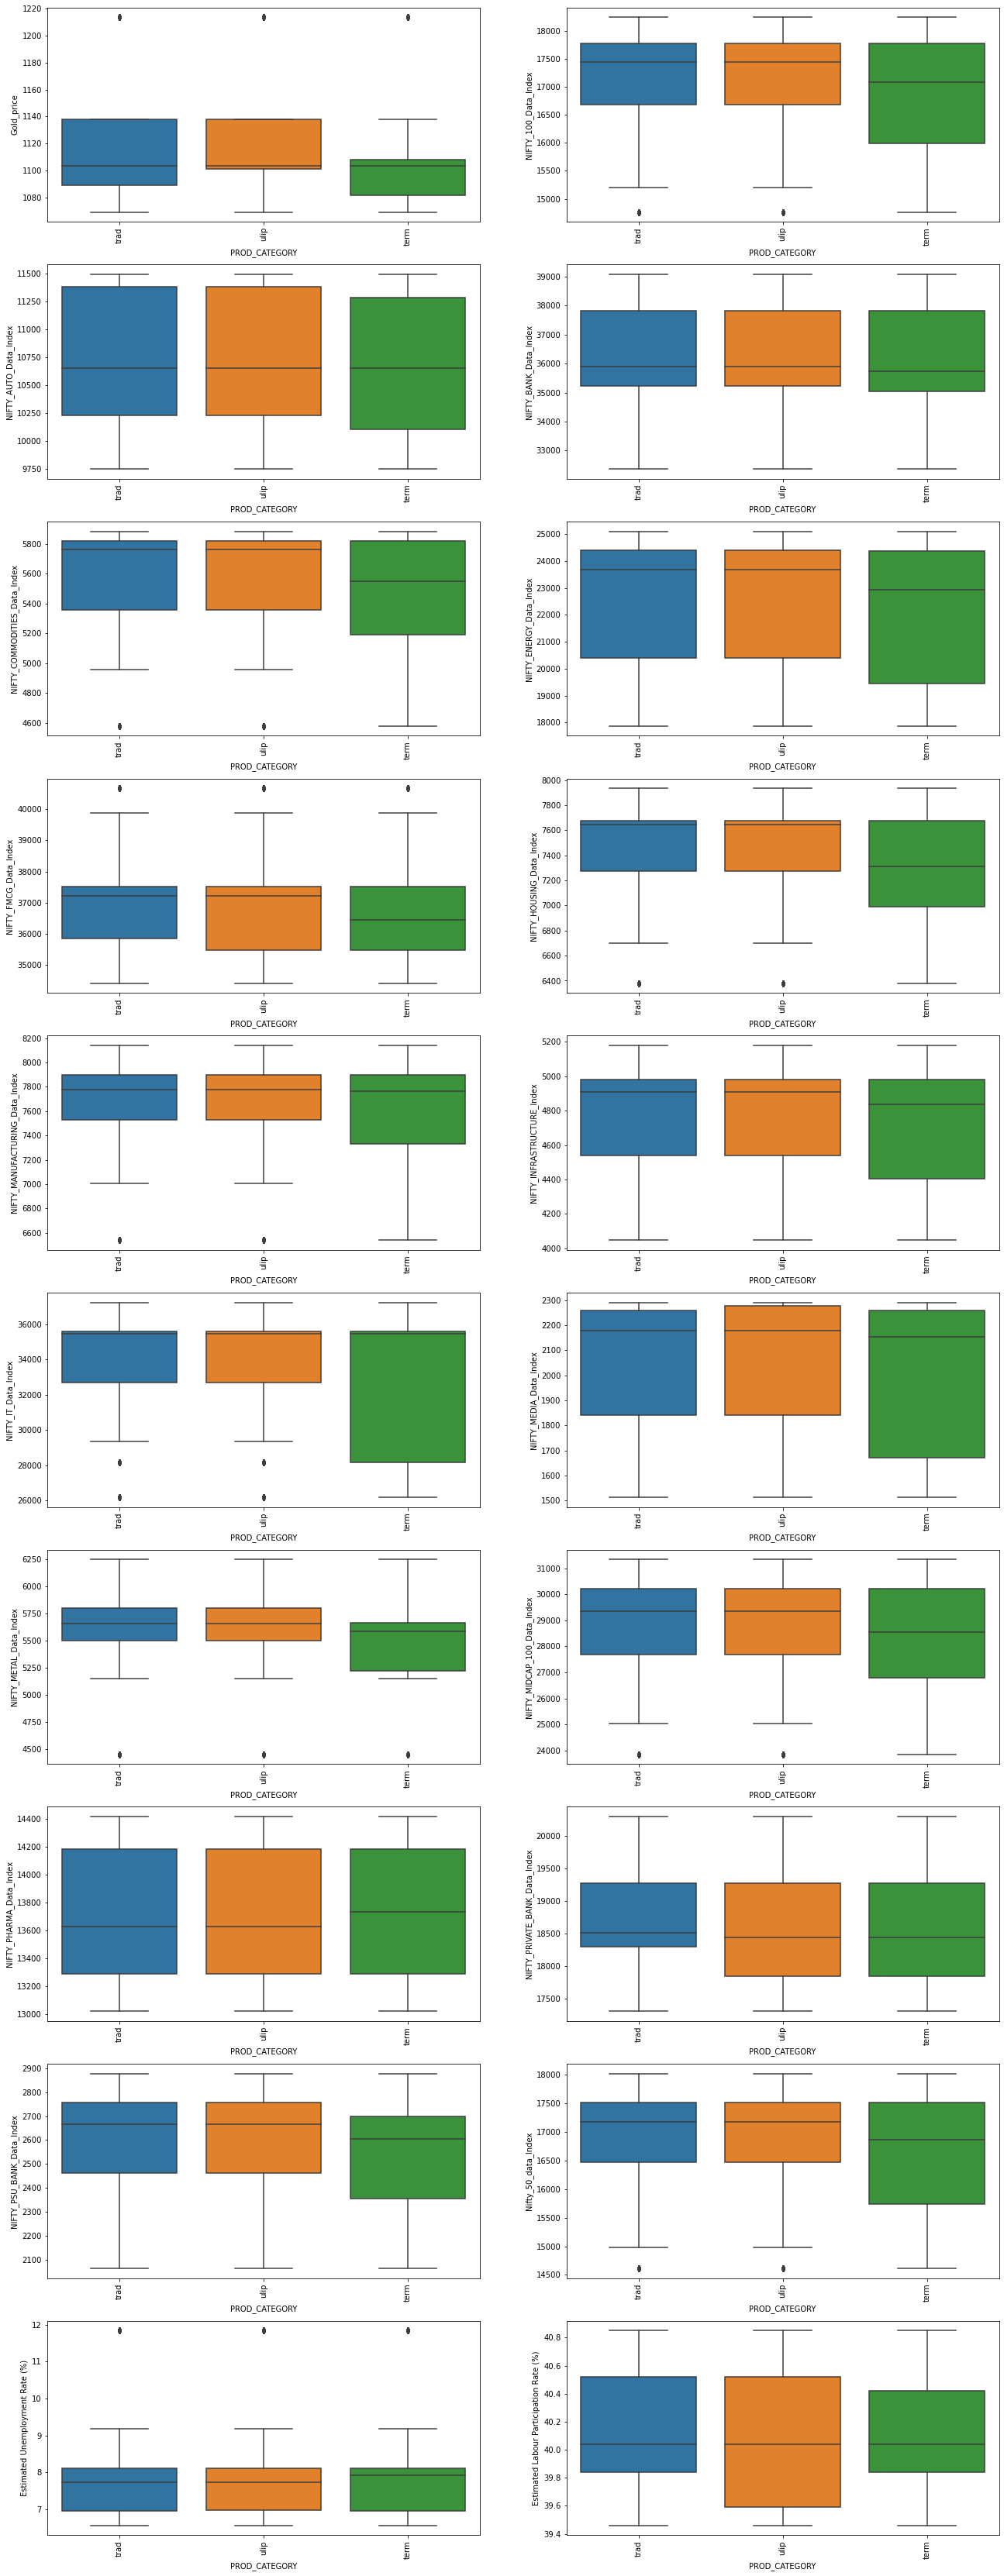

In [23]:
fig, ax = plt.subplots(10,2, figsize = (22,60))
counter=0
for i in columns:
    trace_x = counter // 2
    trace_y = counter % 2
    chart=sns.boxplot(y=i,ax=ax[trace_x, trace_y],data=new_train,x='PROD_CATEGORY')
    #plt.subplots_adjust(hspace=0.5)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    counter += 1
plt.show()

### From above plot only some of the attributes seems insightful Those are
1. 'Gold_price' 
2. 'Estimated Labour Participation Rate (%)' 
3. 'NIFTY_PRIVATE_BANK_Data_Index'

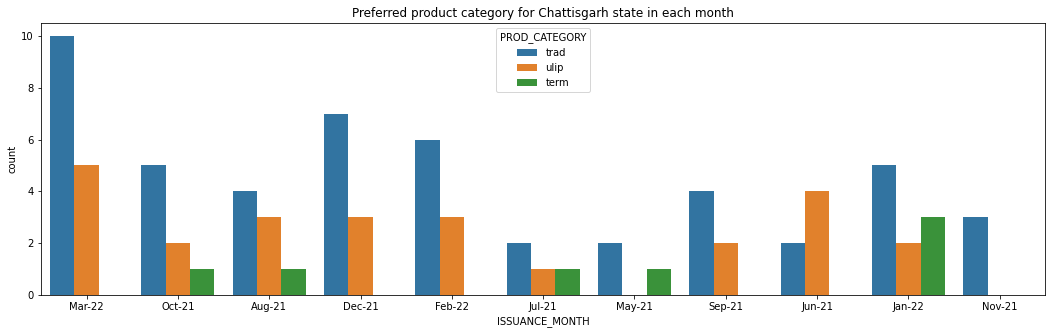

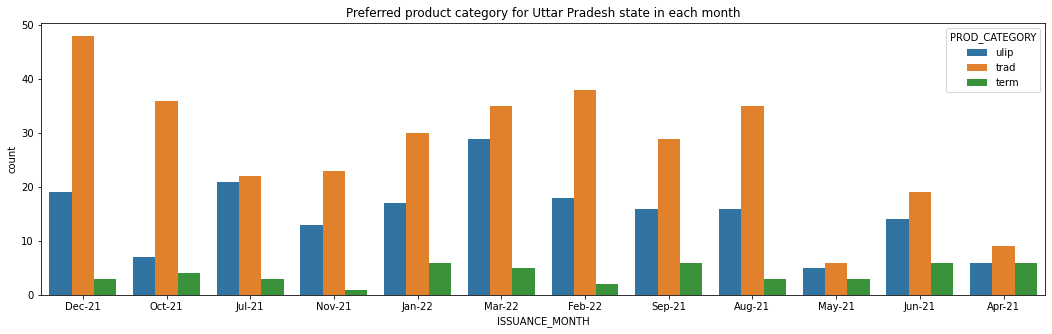

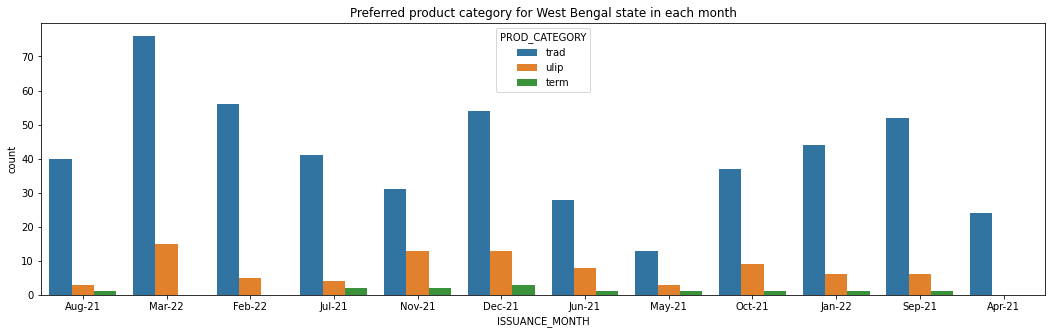

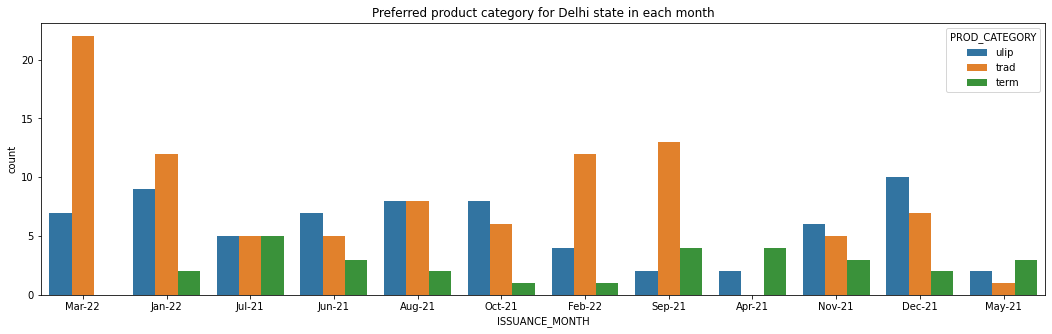

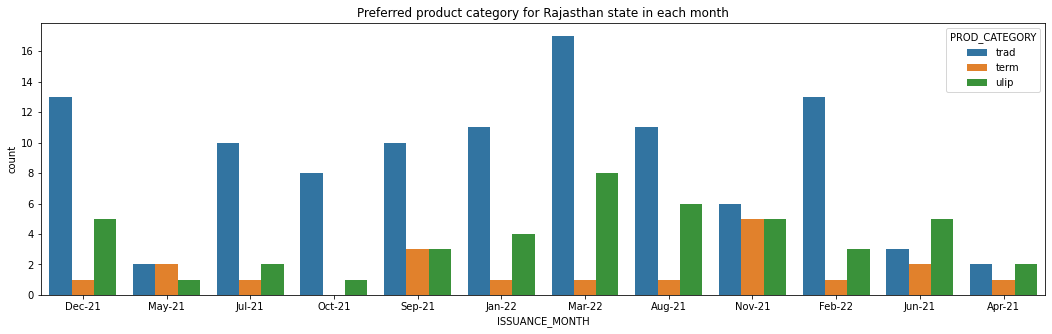

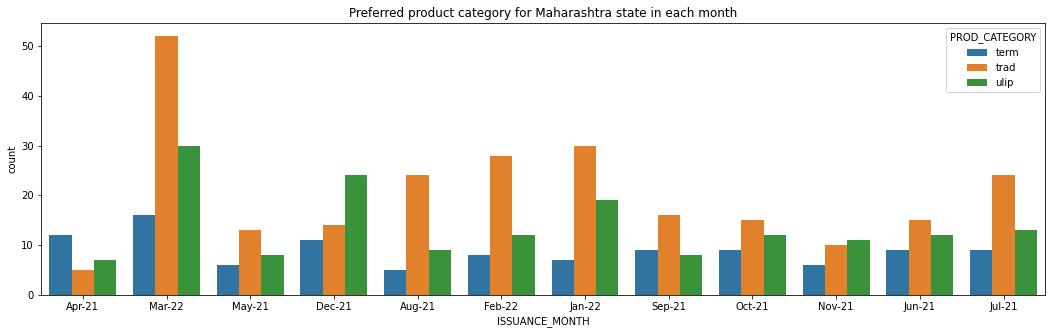

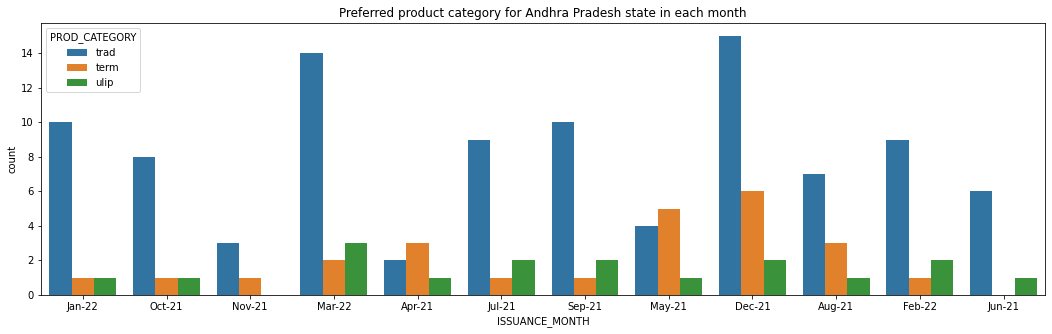

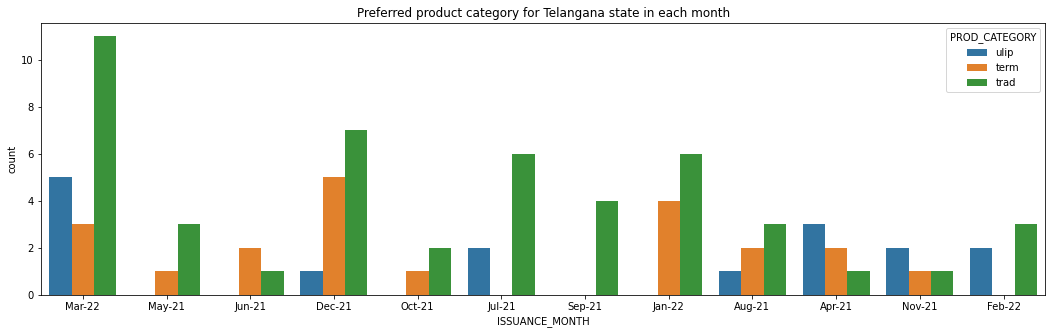

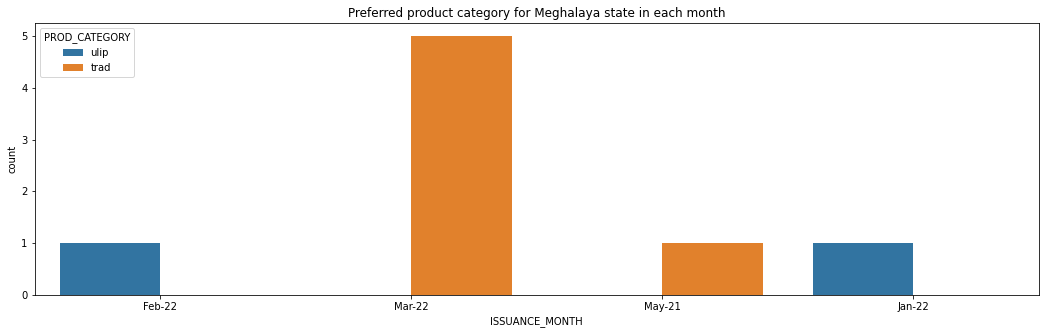

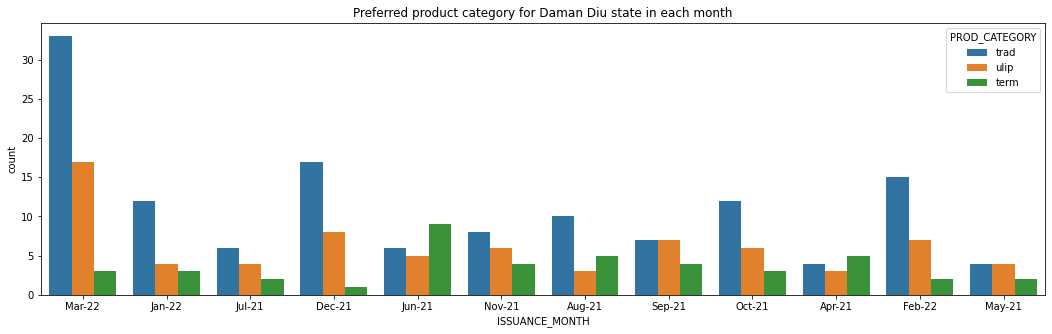

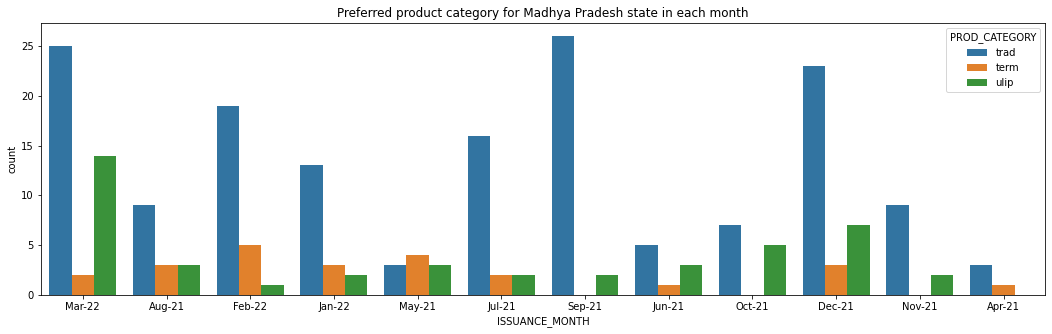

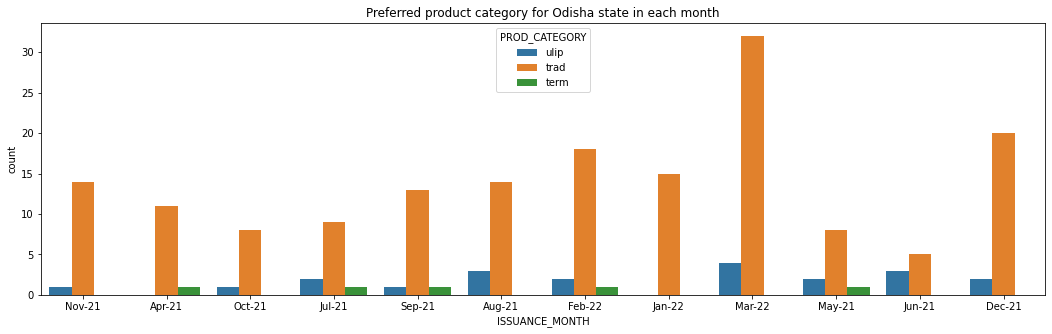

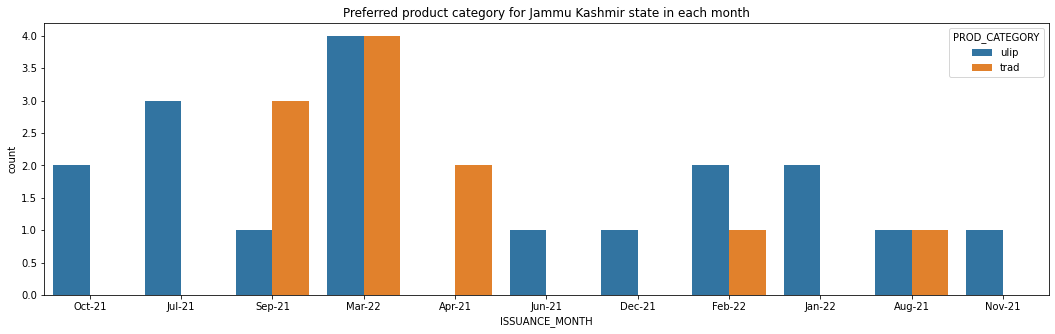

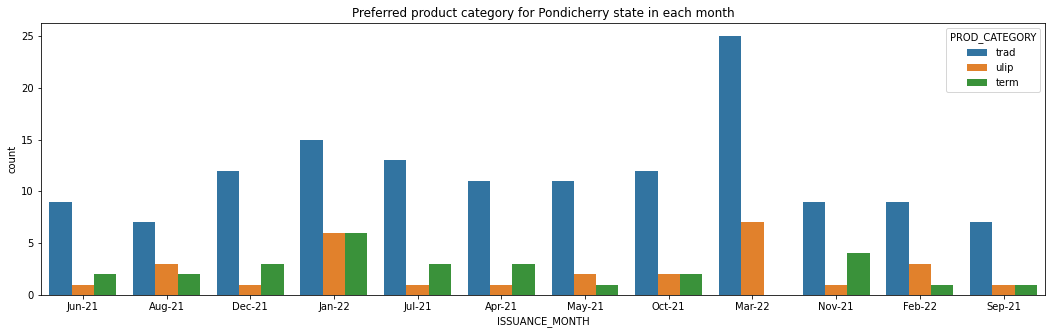

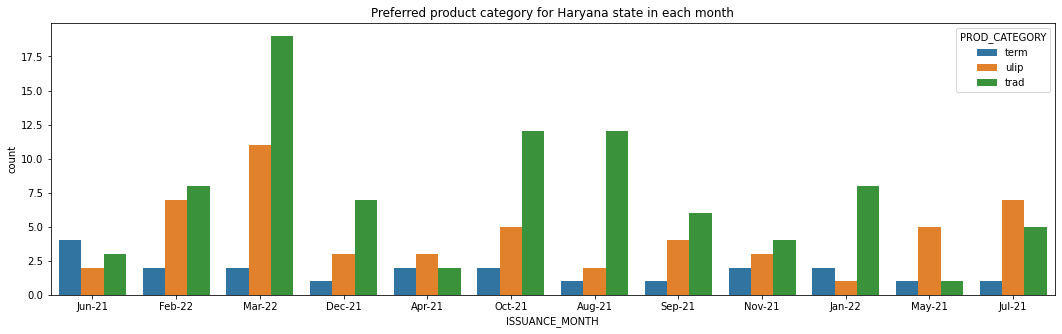

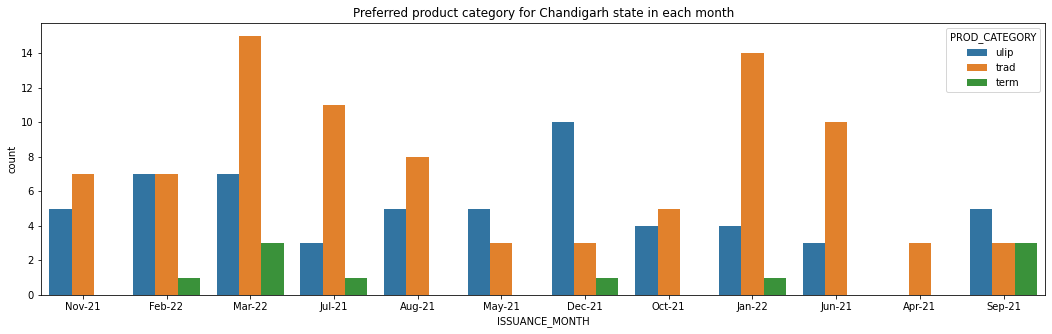

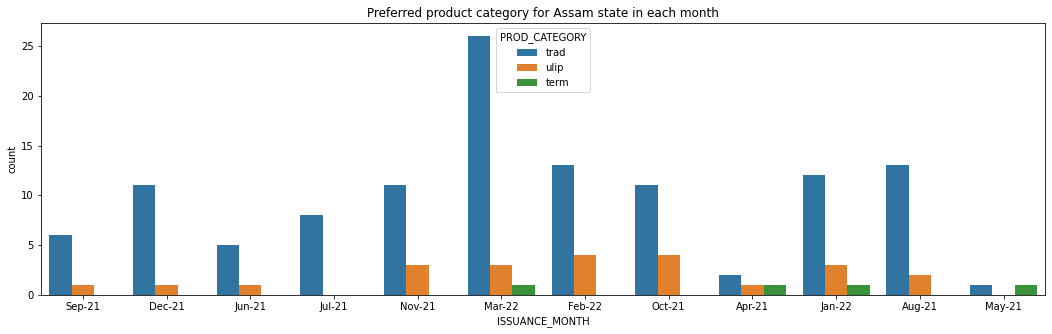

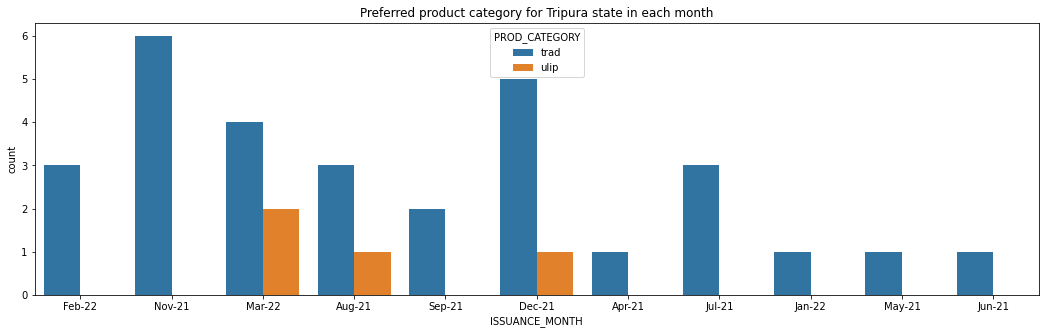

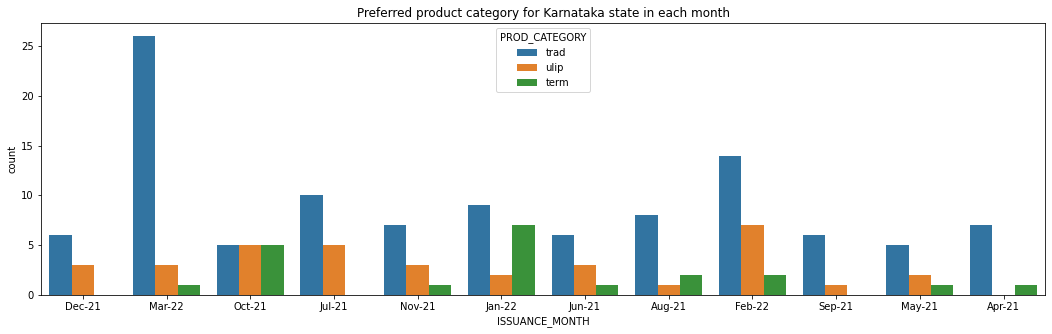

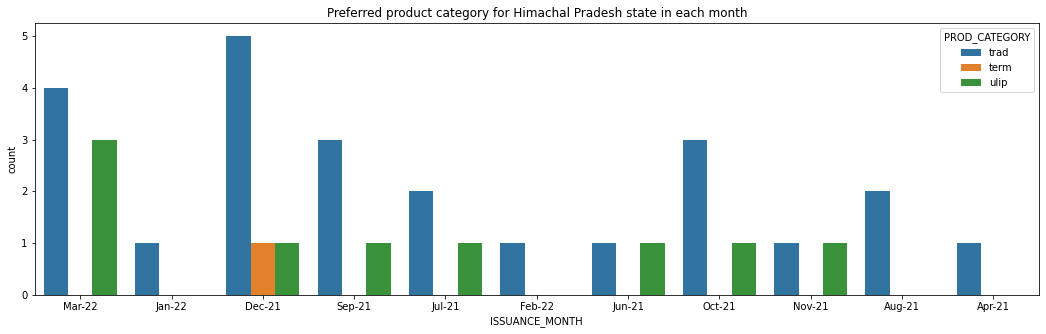

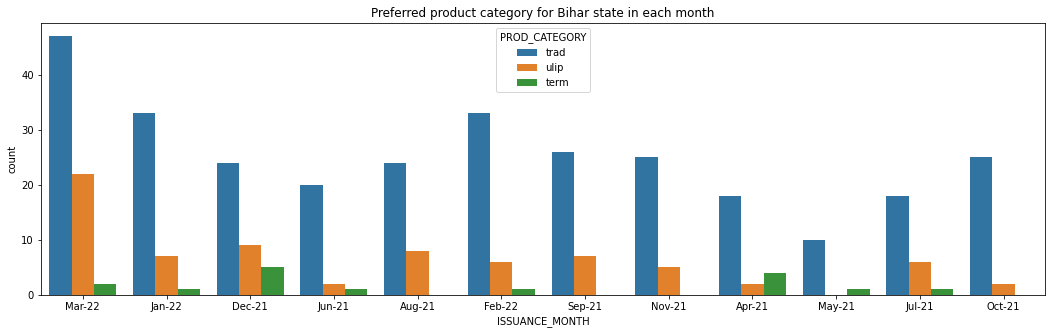

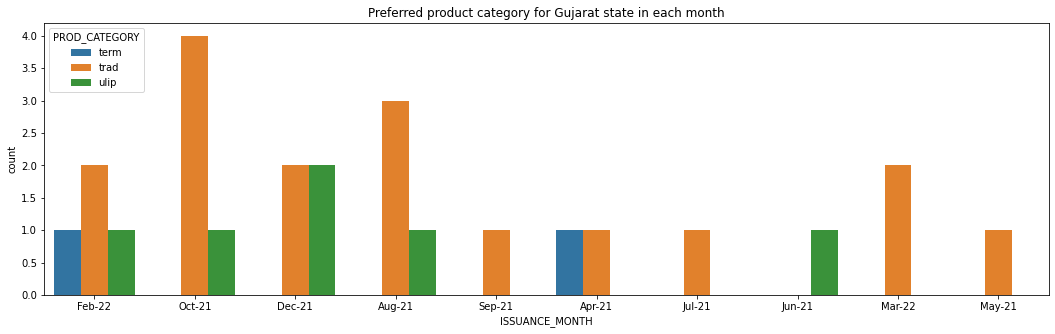

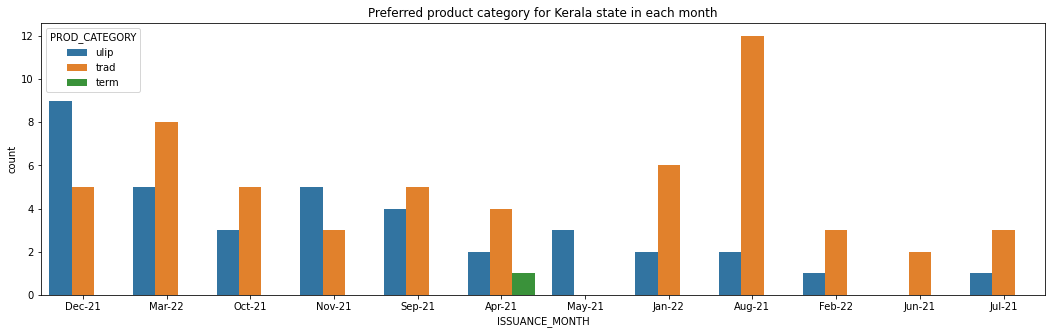

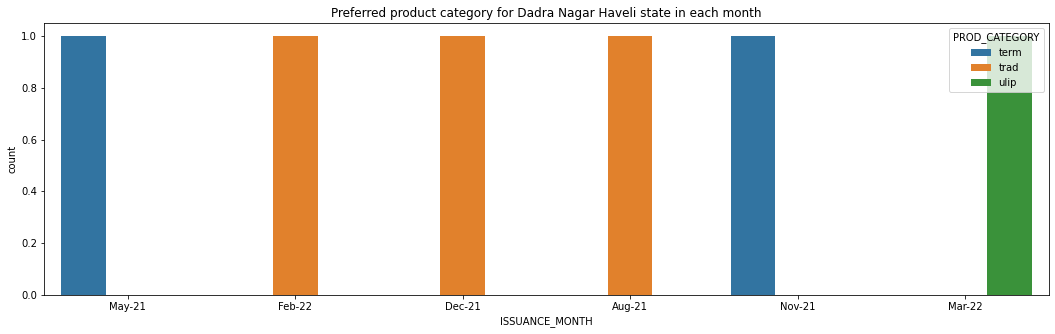

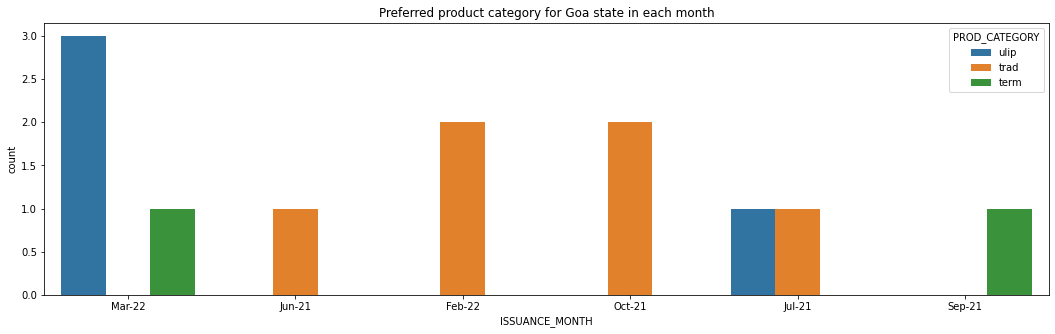

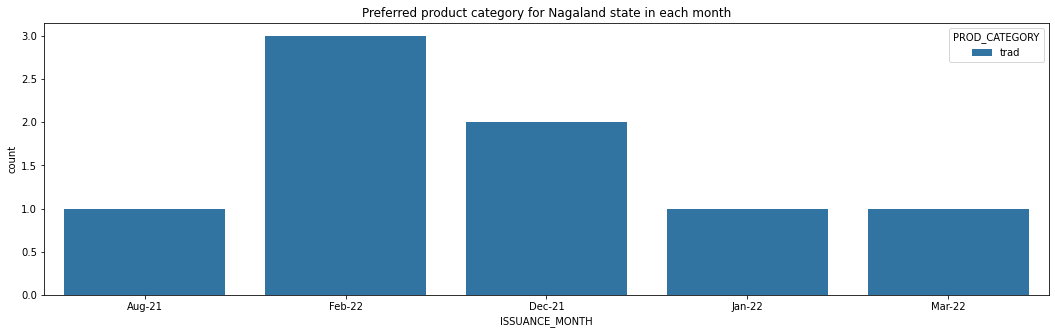

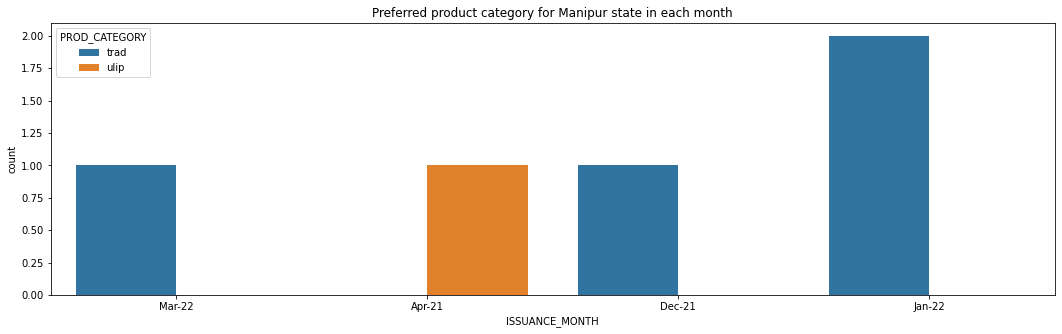

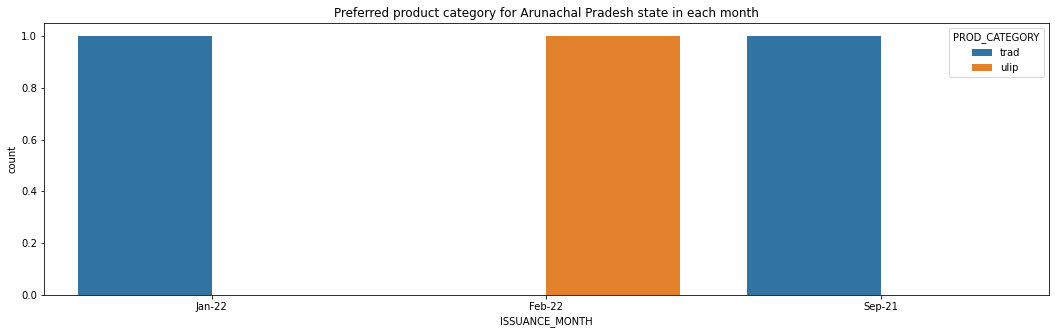

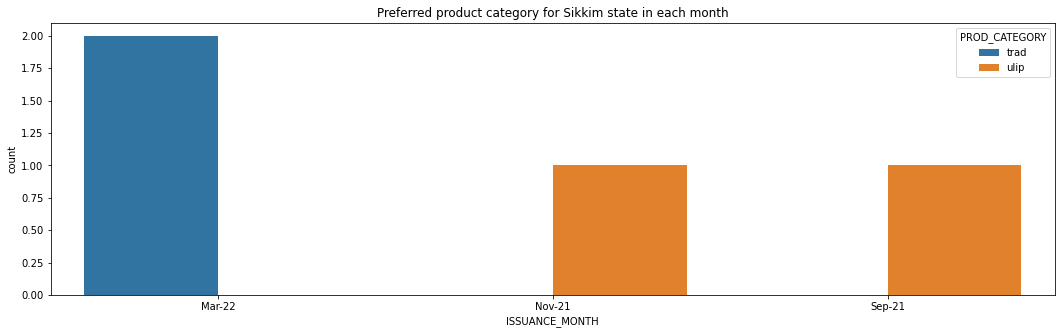

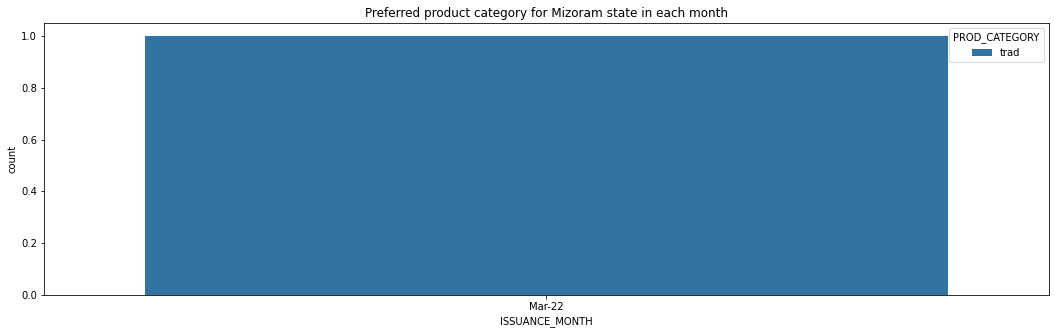

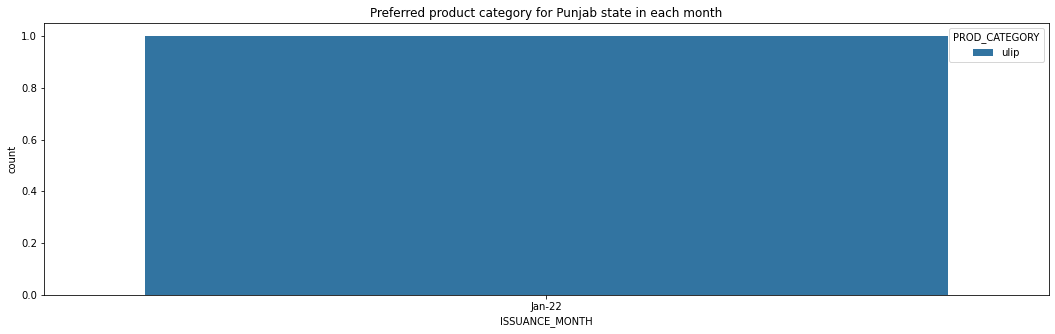

In [24]:
# lets see attribute state have any impact or not 
# lets plot Preferred product category for each state in each month
for i in new_train.State.unique().tolist():
    sns.countplot(x='ISSUANCE_MONTH',hue='PROD_CATEGORY',data=new_train[new_train.State==i])
    plt.title(f'Preferred product category for {i} state in each month')
    plt.show()

## EDA SUMMARY 
* FROM ANALYSING ALL THOSE PLOTS SOME OF THE VERY INSIGHTFUL COLUMNS ARE LISTED BELOW 
1. 'AGE'
2. 'INCOME_SEGMENT'
3. 'Gold_price' 
4. 'Estimated Labour Participation Rate (%)' 
5. 'NIFTY_PRIVATE_BANK_Data_Index'
6. ISSUANCE_MONTH

# MODEL BUILDING 

**Lets do some preprosessing steps**

In [25]:
# defining a function for lebeling the PROSPERITY_INDEX_BAND column 
def labeling(x):
    if x=='Missing':
        return 0 
    elif x=='Very_low':
        return 1 
    elif x=='Low':
        return 2 
    elif x=='Medium':
        return 3 
    elif x=='High':
        return 4 
    else:
        return 5 
        
new_train['PROSPERITY_INDEX_BAND'] = new_train['PROSPERITY_INDEX_BAND'].apply(labeling)
new_test['PROSPERITY_INDEX_BAND'] = new_test['PROSPERITY_INDEX_BAND'].apply(labeling)
new_train.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,...,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),State
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,4,6,Mar-22,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Chattisgarh
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,3,5,Dec-21,...,2289.456522,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565,7.91,40.85,Uttar Pradesh
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,4,5,Aug-21,...,1671.769048,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524,8.32,40.52,West Bengal
3,9199,52.0,higher_secondary,business,712612.0,trad,3,3,2,Mar-22,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,West Bengal
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,5,6,Mar-22,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Delhi


In [26]:
# checking the shape
print(new_train.shape)
print(new_test.shape)

(4498, 31)
(500, 30)


### Next steps 
**we have to split our data into X_train, X_test, y_train, and y_test** 
1. so here our y_train is nothing but the PROD_CATEGORY column from new_train data.
2. And X_train is the new_train data except for the PROD_CATEGORY column and X_test is the new_test data.
3. For preprocessing processes like scaling and encoding what I exactly doing is first I concatenate these new_train and new_test data and then do all preprocessing steps and then I make X_train and X_test for our model building.

In [27]:
# lets make our y_train 
y_train = new_train.PROD_CATEGORY

In [28]:
# concatenating both new_train and new_test and makes a dataframe called model_data
model_data = pd.concat([new_train.drop('PROD_CATEGORY',axis=1),new_test], axis=0,ignore_index=True)

# 'ID' and 'PINCODE' are not useful so lets drop them 
model_data.drop(['ID','PINCODE'],axis=1,inplace=True)
model_data.head()

,AGE,EDUCATION,OCC,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,Gold_price,NIFTY_100_Data_Index,NIFTY_AUTO_Data_Index,...,NIFTY_MEDIA_Data_Index,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),State
0,27.0,masters_plus,salaried_pvt,5,4,6,Mar-22,1213.652174,17082.700000,10230.721429,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Chattisgarh
1,58.0,graduate_plus,salaried_govt,4,3,5,Dec-21,1102.834783,17452.460870,10801.139130,...,2289.456522,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565,7.91,40.85,Uttar Pradesh
2,52.0,masters_plus,salaried_govt,5,4,5,Aug-21,1081.854545,16686.033333,10059.233333,...,1671.769048,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524,8.32,40.52,West Bengal
3,52.0,higher_secondary,business,3,3,2,Mar-22,1213.652174,17082.700000,10230.721429,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,West Bengal
4,34.0,graduate_plus,salaried_pvt,6,5,6,Mar-22,1213.652174,17082.700000,10230.721429,...,2178.476190,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Delhi


In [29]:
#checking the shape
model_data.shape

(4998, 28)

In [30]:
# making dummies variables for categorical columns 
dummy1 = pd.get_dummies(model_data[['EDUCATION','OCC','ISSUANCE_MONTH','State']],drop_first=True)
model_data.drop(['EDUCATION','OCC','ISSUANCE_MONTH','State'],axis=1,inplace=True)
model_data = pd.concat([model_data, dummy1], axis=1) 
model_data.head()

,AGE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,Gold_price,NIFTY_100_Data_Index,NIFTY_AUTO_Data_Index,NIFTY_BANK_Data_Index,NIFTY_COMMODITIES_Data_Index,NIFTY_ENERGY_Data_Index,...,State_Nagaland,State_Odisha,State_Pondicherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Telangana,State_Tripura,State_Uttar Pradesh,State_West Bengal
0,27.0,5,4,6,1213.652174,17082.700000,10230.721429,35229.550000,5821.880952,25098.535714,...,0,0,0,0,0,0,0,0,0,0
1,58.0,4,3,5,1102.834783,17452.460870,10801.139130,35897.010870,5549.939130,22933.297826,...,0,0,0,0,0,0,0,0,1,0
2,52.0,5,4,5,1081.854545,16686.033333,10059.233333,35740.761905,5359.578571,19594.485714,...,0,0,0,0,0,0,0,0,0,1
3,52.0,3,3,2,1213.652174,17082.700000,10230.721429,35229.550000,5821.880952,25098.535714,...,0,0,0,0,0,0,0,0,0,1
4,34.0,6,5,6,1213.652174,17082.700000,10230.721429,35229.550000,5821.880952,25098.535714,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#checking the shape again
model_data.shape

(4998, 80)

In [32]:
# split the data into X_train and X_test
X_train = model_data.iloc[0:4498,:]
X_test = model_data.iloc[4498:,:]

In [33]:
#lets make a list of the numerical columns
columns = X_train.select_dtypes(include=['int','float']).columns.tolist()
columns

['AGE',
 'INCOME_SEGMENT',
 'PROSPERITY_INDEX_BAND',
 'QUALITY_SCORE_BAND',
 'Gold_price',
 'NIFTY_100_Data_Index',
 'NIFTY_AUTO_Data_Index',
 'NIFTY_BANK_Data_Index',
 'NIFTY_COMMODITIES_Data_Index',
 'NIFTY_ENERGY_Data_Index',
 'NIFTY_FMCG_Data_Index',
 'NIFTY_HOUSING_Data_Index',
 'NIFTY_MANUFACTURING_Data_Index',
 'NIFTY_INFRASTRUCTURE_Index',
 'NIFTY_IT_Data_Index',
 'NIFTY_MEDIA_Data_Index',
 'NIFTY_METAL_Data_Index',
 'NIFTY_MIDCAP_100_Data_Index',
 'NIFTY_PHARMA_Data_Index',
 'NIFTY_PRIVATE_BANK_Data_Index',
 'NIFTY_PSU_BANK_Data_Index',
 'Nifty_50_data_Index',
 'Estimated Unemployment Rate (%)',
 'Estimated Labour Participation Rate (%)']

In [34]:
# Lets do the scaleing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [35]:
X_train.head()

,AGE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,Gold_price,NIFTY_100_Data_Index,NIFTY_AUTO_Data_Index,NIFTY_BANK_Data_Index,NIFTY_COMMODITIES_Data_Index,NIFTY_ENERGY_Data_Index,...,State_Nagaland,State_Odisha,State_Pondicherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Telangana,State_Tripura,State_Uttar Pradesh,State_West Bengal
0,-1.026584,0.583065,0.425751,1.745376,2.041993,-0.018685,-0.814252,-0.644029,0.768248,1.108941,...,0,0,0,0,0,0,0,0,0,0
1,1.606207,0.007043,-0.441956,0.892410,-0.351433,0.383866,0.191626,-0.239078,-0.051762,0.172690,...,0,0,0,0,0,0,0,0,1,0
2,1.096635,0.583065,0.425751,0.892410,-0.804563,-0.450528,-1.116656,-0.333875,-0.625772,-1.271016,...,0,0,0,0,0,0,0,0,0,1
3,1.096635,-0.568978,-0.441956,-1.666489,2.041993,-0.018685,-0.814252,-0.644029,0.768248,1.108941,...,0,0,0,0,0,0,0,0,0,1
4,-0.432083,1.159086,1.293459,1.745376,2.041993,-0.018685,-0.814252,-0.644029,0.768248,1.108941,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

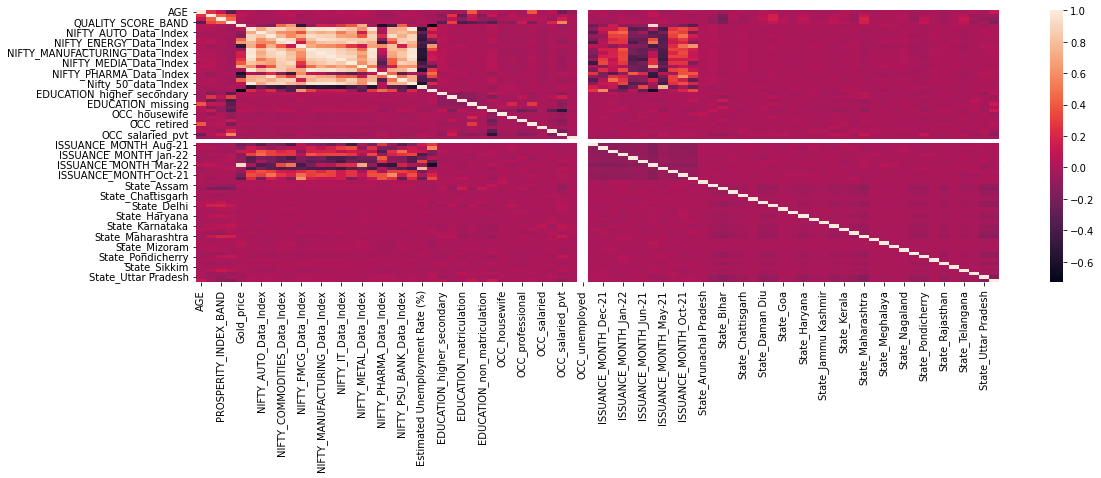

In [36]:
sns.heatmap(X_train.corr())

## Some highly correlated features do exist, these can be dropped

In [37]:
# defining a function to identify the highly correlated attributes 
def correlation(dataset, threshold):
    col_corr = []  # list of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.append(colname)
    return col_corr

In [38]:
highly_correlated_columns = list(set(correlation(X_train, 0.75)))
highly_correlated_columns

['NIFTY_MIDCAP_100_Data_Index',
 'NIFTY_PRIVATE_BANK_Data_Index',
 'NIFTY_COMMODITIES_Data_Index',
 'NIFTY_BANK_Data_Index',
 'NIFTY_ENERGY_Data_Index',
 'NIFTY_IT_Data_Index',
 'NIFTY_INFRASTRUCTURE_Index',
 'NIFTY_METAL_Data_Index',
 'NIFTY_PSU_BANK_Data_Index',
 'ISSUANCE_MONTH_May-21',
 'NIFTY_MEDIA_Data_Index',
 'ISSUANCE_MONTH_Mar-22',
 'NIFTY_HOUSING_Data_Index',
 'Nifty_50_data_Index',
 'NIFTY_MANUFACTURING_Data_Index']

In [39]:
# lest drop these highly correlated columns
X_train.drop(['NIFTY_MIDCAP_100_Data_Index','NIFTY_BANK_Data_Index','NIFTY_ENERGY_Data_Index','NIFTY_MEDIA_Data_Index',\
              'ISSUANCE_MONTH_May-21','NIFTY_PRIVATE_BANK_Data_Index','NIFTY_HOUSING_Data_Index','NIFTY_PSU_BANK_Data_Index',\
              'ISSUANCE_MONTH_Mar-22','NIFTY_METAL_Data_Index','Nifty_50_data_Index','NIFTY_MANUFACTURING_Data_Index',\
              'NIFTY_INFRASTRUCTURE_Index','NIFTY_IT_Data_Index','NIFTY_COMMODITIES_Data_Index'],axis=1,inplace=True) 

X_test.drop(['NIFTY_MIDCAP_100_Data_Index','NIFTY_BANK_Data_Index','NIFTY_ENERGY_Data_Index','NIFTY_MEDIA_Data_Index',\
              'ISSUANCE_MONTH_May-21','NIFTY_PRIVATE_BANK_Data_Index','NIFTY_HOUSING_Data_Index','NIFTY_PSU_BANK_Data_Index',\
              'ISSUANCE_MONTH_Mar-22','NIFTY_METAL_Data_Index','Nifty_50_data_Index','NIFTY_MANUFACTURING_Data_Index',\
              'NIFTY_INFRASTRUCTURE_Index','NIFTY_IT_Data_Index','NIFTY_COMMODITIES_Data_Index'],axis=1,inplace=True) 


In [40]:
print(X_train.shape)
print(X_test.shape)

(4498, 65)
(500, 65)


# Hyper-Parameter Tuning

In [41]:
# let's import some best classification algorithms and saw which one is performing best 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB



In [42]:
# before that we also have to lebeled our y_train
from sklearn.preprocessing import LabelEncoder 
Label_Encoder = LabelEncoder()
y_train = Label_Encoder.fit_transform(y_train)
y_train

array([1, 2, 1, ..., 1, 1, 1])

In [43]:
model_parameter ={
    "Logistic_Regression" :{
                        "model" : LogisticRegression(solver='liblinear'),
                        "param" : {}
                       },

    "SVC" : { 
             "model" : SVC(),
             "param" : {'C' :[1.0],
             'kernel' : ['linear'],'gamma': ['scale','auto']}
            },
    
    "XGBClassifier" :{"model" : XGBClassifier()
                      ,"param" : {}
                     },
    
    "Decision_Tree" :{
                        "model" : DecisionTreeClassifier(),
                        "param" : {'criterion' : ["gini", "entropy"]}
                     },
    
    "KNeighborsClassifier" : {
                              "model" : KNeighborsClassifier(),
                              "param" : {'n_neighbors' : [4,5,6]}
                             },
    
    "RandomForestClassifier" :{
                                 "model" : RandomForestClassifier(),
                                "param" : {'criterion' : ["gini", "entropy"],
                                'n_estimators' : [85,100,110,105]}
                              },
    
    "BernoulliNB" :  {
                    "model" : BernoulliNB(),
                    "param" : {}
                     },
    
    
    "GaussianNB" :{
                    "model" : GaussianNB(),
                    "param" : {}
                  },

   "GradientBoostingClassifier" :{
                                   "model" : GradientBoostingClassifier(),
                                   "param" : {'n_estimators' : [10,50,100]}
                                  }

}

In [44]:
# Model Section 
# Note:- This will take some time so be patience
from sklearn.model_selection import GridSearchCV
Scores = []
for model_name ,model_param in model_parameter.items():
    gs = GridSearchCV(model_param['model'],model_param['param'],cv = 5,return_train_score=False)
    gs.fit(X_train,y_train)
    Scores.append({'Model': model_name,
                 'Best_Score' : gs.best_score_,
                 'Best_Parameter' : gs.best_params_})

Model_Report = pd.DataFrame(Scores,columns=['Model','Best_Score','Best_Parameter'])
Model_Report.sort_values(by='Best_Score',ascending=False)

,Model,Best_Score,Best_Parameter
8,GradientBoostingClassifier,0.680528,{'n_estimators': 100}
0,Logistic_Regression,0.663856,{}
5,RandomForestClassifier,0.655403,"{'criterion': 'gini', 'n_estimators': 110}"
2,XGBClassifier,0.654068,{}
1,SVC,0.651626,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}"
4,KNeighborsClassifier,0.635395,{'n_neighbors': 6}
6,BernoulliNB,0.631621,{}
3,Decision_Tree,0.593151,{'criterion': 'entropy'}
7,GaussianNB,0.195424,{}


**GradientBoosting and Logistic Regression are seems best model for this data**

In [45]:
# Lets use RFE(Recursive Feature Elimination) to get top 45 attributes 
from sklearn.feature_selection import RFE
LR = LogisticRegression()
rfe_top40 = RFE(LR,n_features_to_select=40,step=1)             
rfe_top40 = rfe_top40.fit(X_train, y_train)
col=X_train.columns[rfe_top40.support_].to_list() 
col

['AGE',
 'INCOME_SEGMENT',
 'Gold_price',
 'EDUCATION_higher_secondary',
 'EDUCATION_matriculation',
 'EDUCATION_missing',
 'EDUCATION_non_matriculation',
 'OCC_housewife',
 'OCC_missing',
 'OCC_professional',
 'OCC_retired',
 'OCC_salaried_govt',
 'OCC_salaried_pvt',
 'OCC_student',
 'ISSUANCE_MONTH_Aug-21',
 'ISSUANCE_MONTH_Nov-21',
 'State_Arunachal Pradesh',
 'State_Assam',
 'State_Bihar',
 'State_Chandigarh',
 'State_Chattisgarh',
 'State_Dadra Nagar Haveli',
 'State_Daman Diu',
 'State_Delhi',
 'State_Goa',
 'State_Haryana',
 'State_Himachal Pradesh',
 'State_Jammu Kashmir',
 'State_Kerala',
 'State_Maharashtra',
 'State_Manipur',
 'State_Nagaland',
 'State_Odisha',
 'State_Punjab',
 'State_Rajasthan',
 'State_Sikkim',
 'State_Telangana',
 'State_Tripura',
 'State_Uttar Pradesh',
 'State_West Bengal']

### According to RFE most important features are 
1. 'AGE'
2. 'INCOME_SEGMENT'
3. 'Gold_price'
4. 'EDUCATION' 
5. 'OCC' 
6. 'ISSUANCE_MONTH'
7. 'State'


### Next steps 
**As we saw that GradientBoosting and Logistic Regression seemed the best algorithm for this data**
1. first let's use logistic regression with these top 45 columns by RFE and then check the VIF(Variance inflation factor) to see is there any multicollinearity issues are present or not.
2. If yes, then remove those features and again fit the model. 
3. Then use the GradientBoosting algorithm to see how this performs well as compared to logistic regression.


#### Logistic Regression

In [46]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier 
oneVsrest = OneVsRestClassifier(LR)
# Fitting the model with training data 
logm1 = oneVsrest.fit(X_train[col], y_train) 

In [47]:
from sklearn.metrics import accuracy_score
prediction_oneVsrest = logm1.predict(X_train[col]) 
accuracy_score(y_train, prediction_oneVsrest) 

0.6760782570031125

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
VIF(X_train[col])

,Features,VIF
0,AGE,1.55
5,EDUCATION_missing,1.46
12,OCC_salaried_pvt,1.43
1,INCOME_SEGMENT,1.40
4,EDUCATION_matriculation,1.36
10,OCC_retired,1.27
29,State_Maharashtra,1.27
39,State_West Bengal,1.23
18,State_Bihar,1.22
3,EDUCATION_higher_secondary,1.22


**Now all good No need to Drop any features** 

In [50]:
# Lets saw the classification report for Logistic regression model 
from sklearn.metrics import classification_report
print(classification_report(y_train, logm1.predict(X_train[col])))

              precision    recall  f1-score   support

           0       0.50      0.23      0.32       450
           1       0.70      0.94      0.80      2945
           2       0.50      0.17      0.25      1103

    accuracy                           0.68      4498
   macro avg       0.57      0.44      0.46      4498
weighted avg       0.63      0.68      0.62      4498



#### GradientBoosting

In [51]:
#Fit The Model
gb = GradientBoostingClassifier(n_estimators= 100)
GB = gb.fit(X_train[col],y_train)

In [52]:
# Lets saw the accuracy  score
GB.predict(X_train[col])
accuracy_score(y_train,GB.predict(X_train[col])) 

0.7234326367274344

In [53]:
# Lets saw the classification report for GradientBoosting model
from sklearn.metrics import classification_report
print(classification_report(y_train, GB.predict(X_train[col])))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49       450
           1       0.73      0.95      0.83      2945
           2       0.73      0.24      0.36      1103

    accuracy                           0.72      4498
   macro avg       0.69      0.53      0.56      4498
weighted avg       0.72      0.72      0.68      4498



### Gradient Boosting slightly perform well from Logistic regression 

In [54]:
# Lets also do a cross validation check 
# Note:- This will take some time so be patience
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
cv_gb = cross_val_score(gb, X_train[col], y_train, cv=kfold, scoring='accuracy')
cv_lm = cross_val_score(oneVsrest, X_train[col], y_train, cv=kfold, scoring='accuracy')
print(f'Mean Cross validation for Gradient Boosting Model {np.mean(cv_gb.tolist())}')
print(f'Mean Cross validation for Linear Regression Model {np.mean(cv_lm.tolist())}')

Mean Cross validation for Gradient Boosting Model 0.6858683494184608
Mean Cross validation for Linear Regression Model 0.6694204404850284


In [55]:
# Make a submission file for prediction 

# defining a function for re assign the values for target column PROD_CATEGORY
def mapping(x):
    if x==0:
        return 'term'
    elif x==1:
        return 'trad'
    else:
        return 'ulip'
    
test['PROD_CATEGORY'] = GB.predict(X_test[col])
test['PROD_CATEGORY']  = test['PROD_CATEGORY'].apply(mapping)
submission = test[['ID','PROD_CATEGORY']]
submission.head()

,ID,PROD_CATEGORY
0,7378,trad
1,9511,trad
2,9642,trad
3,6896,trad
4,9833,trad


### saving the file
<code>submission.to_csv(r'E:\UPGRAD HACKATHON\submission_gradient_boosting.csv',index=None)</code>

# CLUSTERING 

In [56]:
# lets take our model and starts making cluster 
cluster_model = X_train[col]

#### Lets do a  Hopkins Statistics test :
**The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.**

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [57]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
#import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H 

In [58]:
hopkins(cluster_model)

0.8617100831336328

**0.86 means our model is high tendency to make cluster**

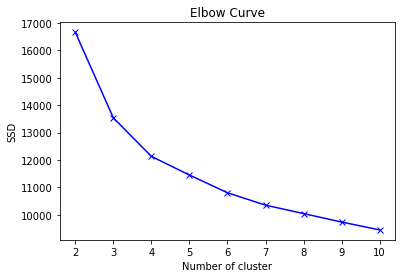

In [59]:
from sklearn.cluster import KMeans 
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100,random_state=100)
    kmeans.fit(cluster_model)
    
    ssd.append(kmeans.inertia_) 
    
SSD = pd.DataFrame({'Number_of_cluster':range_n_clusters,'SSD':ssd}).set_index('Number_of_cluster') 
plt.figure(figsize=[6,4])
plt.plot(SSD,'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('SSD') 
plt.title('Elbow Curve') 
plt.show()

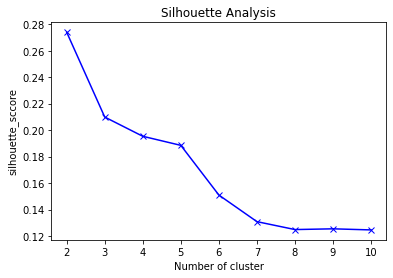

In [60]:
from sklearn.metrics import silhouette_score
silhouette_sccore = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100,random_state=100)
    kmeans.fit(cluster_model) 
    #cluster_label 
    cluster_labels = kmeans.labels_  
    # silhouette score 
    silhouette_avg = silhouette_score(cluster_model, cluster_labels) 
    silhouette_sccore.append(silhouette_avg) 

Silhouette_Score = pd.DataFrame({'Number_of_cluster':range_n_clusters,'Silhouette_Score':silhouette_sccore}).set_index('Number_of_cluster') 
plt.figure(figsize=[6,4])
plt.plot(Silhouette_Score,'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette_sccore') 
plt.title('Silhouette Analysis') 
plt.show()

In [61]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

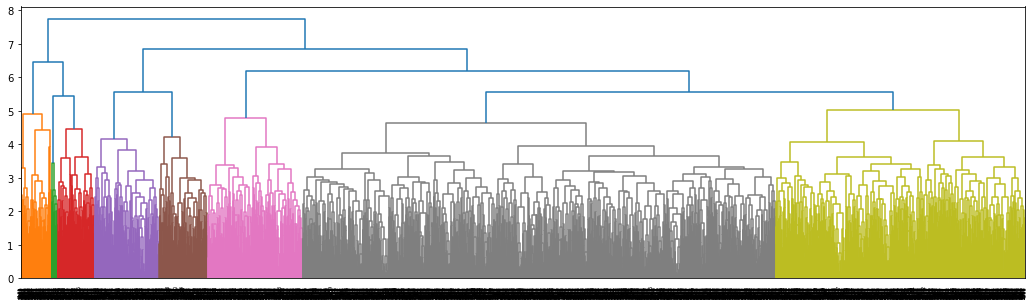

In [62]:
mergings = linkage(cluster_model,method='complete')
dendrogram(mergings)
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

In [63]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=1000,random_state=150)
kmeans.fit(cluster_model)

KMeans(max_iter=1000, n_clusters=4, random_state=150)

In [64]:
kmeans.labels_

array([3, 2, 2, ..., 0, 3, 3])

In [65]:
new_train['cluster_id'] = kmeans.labels_
new_train.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,...,NIFTY_METAL_Data_Index,NIFTY_MIDCAP_100_Data_Index,NIFTY_PHARMA_Data_Index,NIFTY_PRIVATE_BANK_Data_Index,NIFTY_PSU_BANK_Data_Index,Nifty_50_data_Index,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),State,cluster_id
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,4,6,Mar-22,...,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Chattisgarh,3
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,3,5,Dec-21,...,5499.489130,30217.426087,13542.284783,18290.136957,2603.878261,17174.269565,7.91,40.85,Uttar Pradesh,2
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,4,5,Aug-21,...,5654.302381,27686.309524,14180.711905,18508.202381,2354.666667,16470.459524,8.32,40.52,West Bengal,2
3,9199,52.0,higher_secondary,business,712612.0,trad,3,3,2,Mar-22,...,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,West Bengal,3
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,5,6,Mar-22,...,6248.480952,28534.659524,13289.476190,17826.397368,2666.361905,16864.673810,7.57,39.46,Delhi,3


In [66]:
new_train.cluster_id.value_counts()

0    1944
1     931
2     862
3     761
Name: cluster_id, dtype: int64

# EXPLORATORY DATA ANALYSIS IN CLUSTERS 

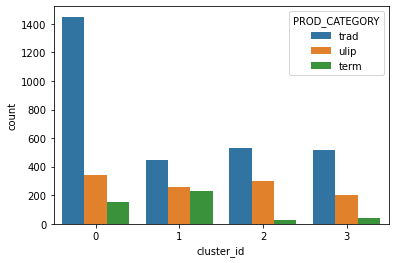

In [67]:
sns.countplot(data=new_train,x='cluster_id',hue='PROD_CATEGORY')
plt.show()

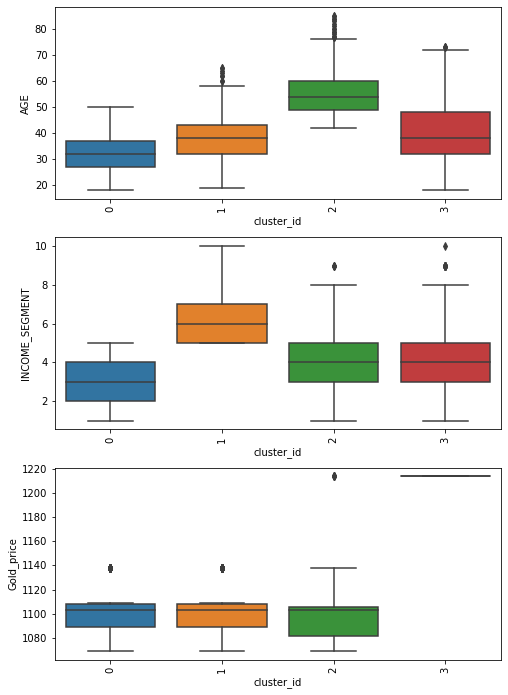

In [68]:
Numerical_variables = ['AGE','INCOME_SEGMENT','Gold_price']
fig, ax = plt.subplots(3,1, figsize = (8,12))
counter=0
for i in Numerical_variables:
    trace_x = counter // 1
    trace_y = counter % 1
    chart=sns.boxplot(y=i,ax=ax[trace_x],data=new_train,x='cluster_id')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    counter += 1
plt.show()

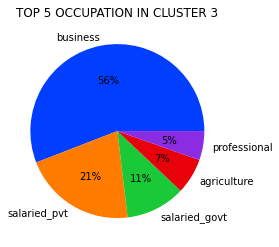

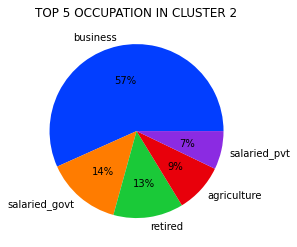

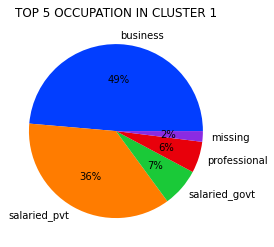

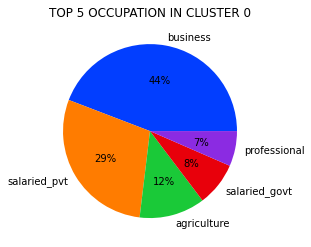

In [69]:
for i in new_train.cluster_id.unique().tolist():
    chart = new_train[new_train['cluster_id']==i].OCC.value_counts()[0:5].reset_index()
    data = chart['OCC'].tolist()
    keys = chart['index'].tolist()
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f'TOP 5 OCCUPATION IN CLUSTER {i}')
    plt.show()

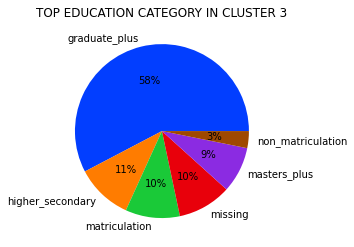

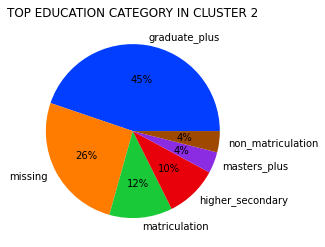

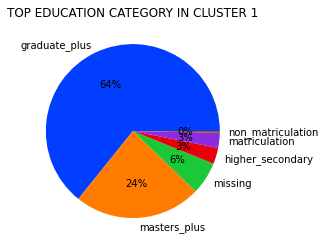

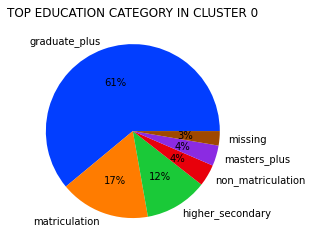

In [70]:
for i in new_train.cluster_id.unique().tolist():
    chart = new_train[new_train['cluster_id']==i].EDUCATION.value_counts().reset_index()
    data = chart['EDUCATION'].tolist()
    keys = chart['index'].tolist()
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f'TOP EDUCATION CATEGORY IN CLUSTER {i}')
    plt.show()

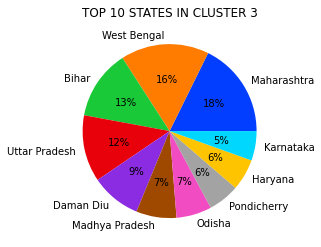

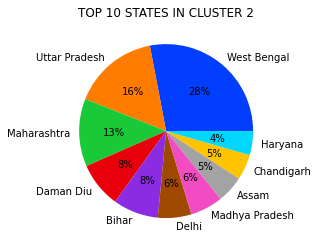

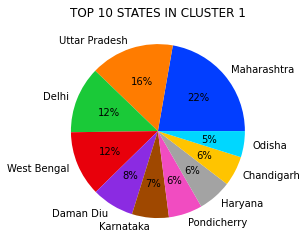

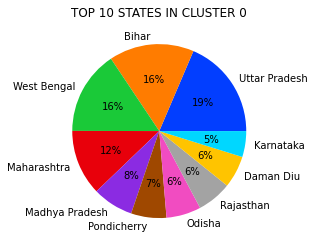

In [71]:
for i in new_train.cluster_id.unique().tolist():
    chart = new_train[new_train['cluster_id']==i].State.value_counts()[0:10].reset_index()
    data = chart['State'].tolist()
    keys = chart['index'].tolist()
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f'TOP 10 STATES IN CLUSTER {i}')
    plt.show()

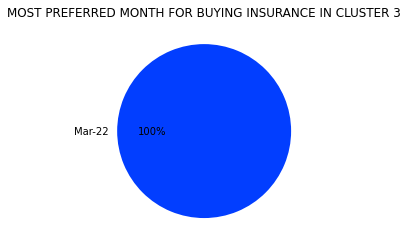

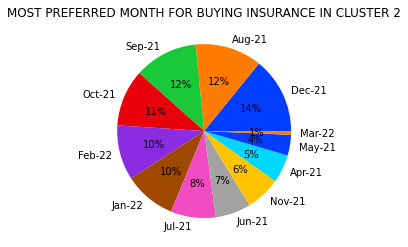

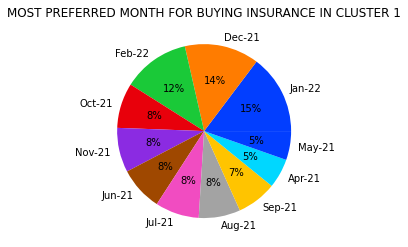

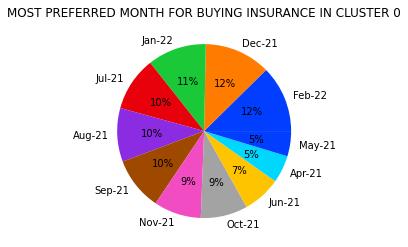

In [72]:
for i in new_train.cluster_id.unique().tolist():
    chart = new_train[new_train['cluster_id']==i].ISSUANCE_MONTH.value_counts().reset_index()
    data = chart['ISSUANCE_MONTH'].tolist()
    keys = chart['index'].tolist()
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f'MOST PREFERRED MONTH FOR BUYING INSURANCE IN CLUSTER {i}')
    plt.show()

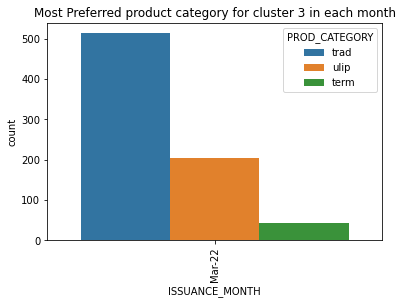

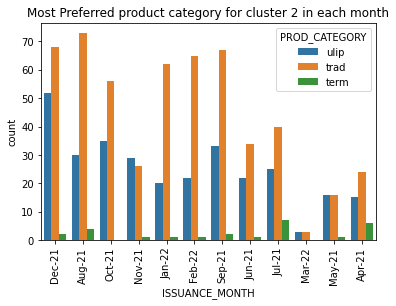

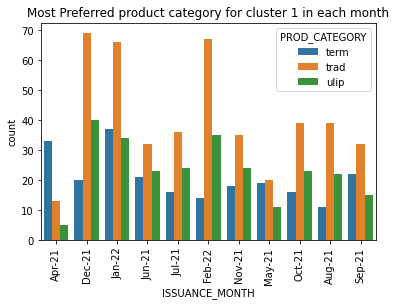

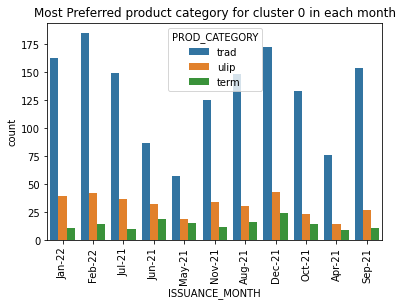

In [73]:
for i in new_train.cluster_id.unique().tolist():
    sns.countplot(x='ISSUANCE_MONTH',hue='PROD_CATEGORY',data=new_train[new_train['cluster_id']==i])
    plt.title(f'Most Preferred product category for cluster {i} in each month')
    plt.xticks(rotation=90)
    plt.show()

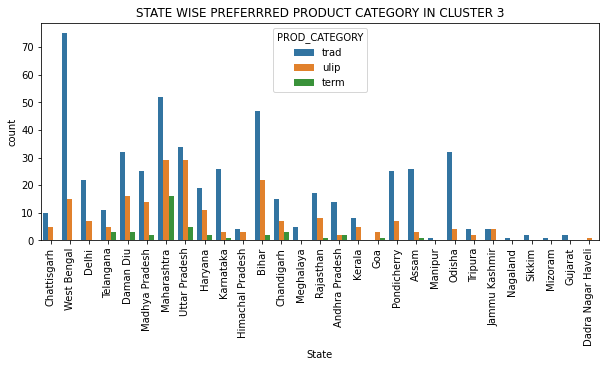

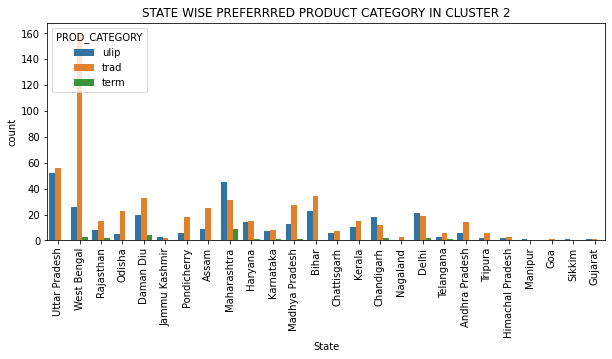

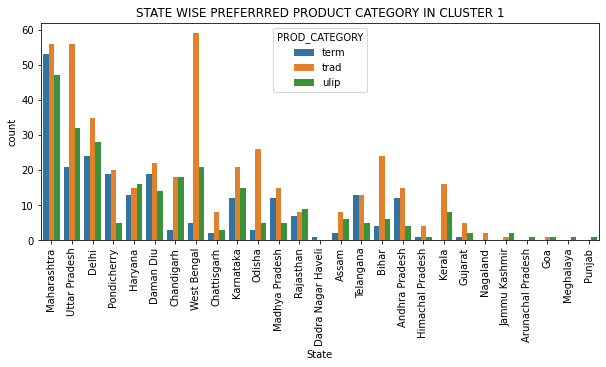

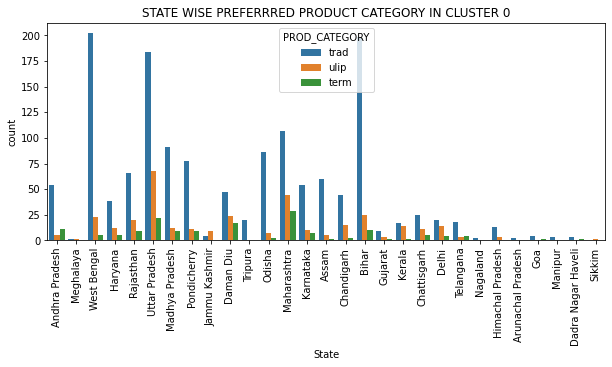

In [74]:
for i in new_train.cluster_id.unique().tolist():
    plt.figure(figsize=[10,4])
    sns.countplot(x='State',hue='PROD_CATEGORY',data=new_train[new_train['cluster_id']==i])
    plt.title(f'STATE WISE PREFERRRED PRODUCT CATEGORY IN CLUSTER {i}')
    plt.xticks(rotation=90)
    plt.show()

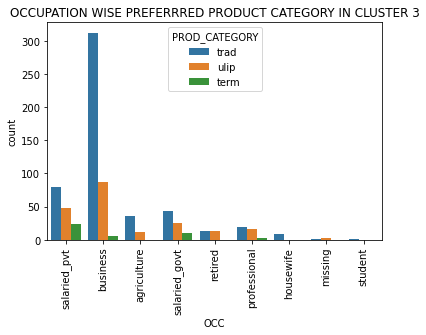

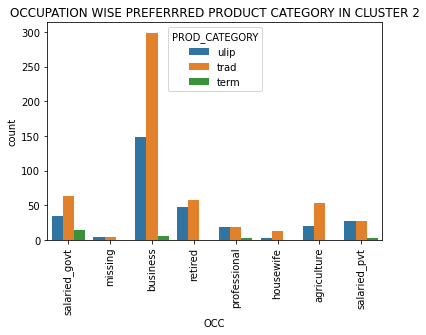

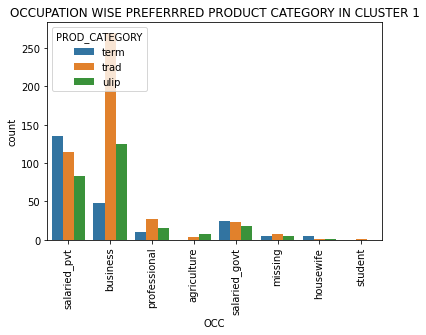

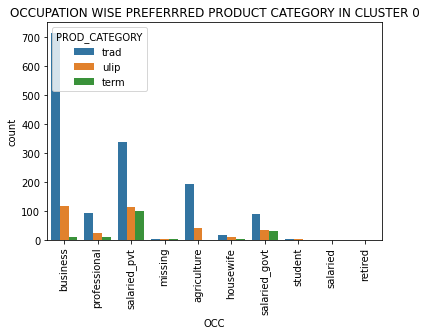

In [75]:
for i in new_train.cluster_id.unique().tolist():
    plt.figure(figsize=[6,4])
    sns.countplot(x='OCC',hue='PROD_CATEGORY',data=new_train[new_train['cluster_id']==i])
    plt.title(f'OCCUPATION WISE PREFERRRED PRODUCT CATEGORY IN CLUSTER {i}')
    plt.xticks(rotation=90)
    plt.show()

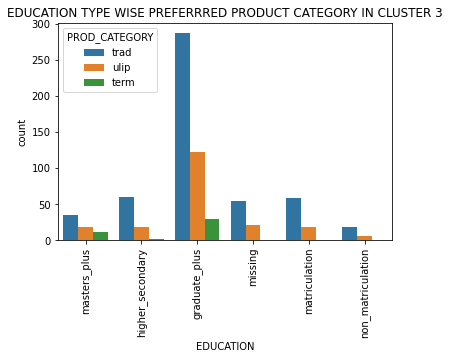

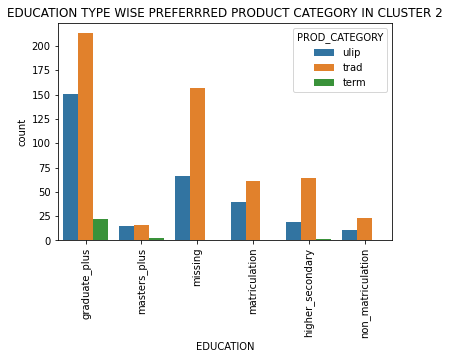

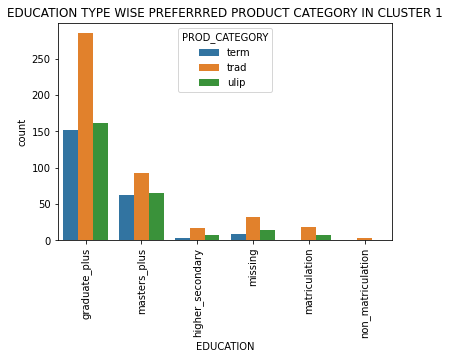

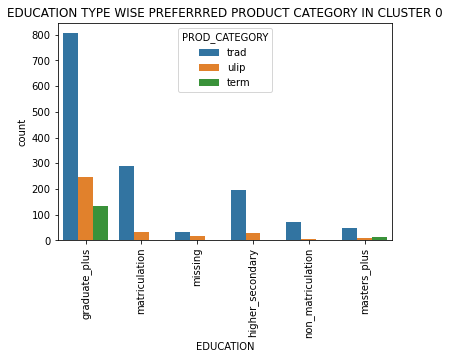

In [76]:
for i in new_train.cluster_id.unique().tolist():
    plt.figure(figsize=[6,4])
    sns.countplot(x='EDUCATION',hue='PROD_CATEGORY',data=new_train[new_train['cluster_id']==i])
    plt.title(f'EDUCATION TYPE WISE PREFERRRED PRODUCT CATEGORY IN CLUSTER {i}')
    plt.xticks(rotation=90)
    plt.show()

# CLUSTER SUMMARY 

### Cluster 0 
* For this cluster the ages vary from 20 to 50 and the mean age was 33.
* Clients from these clusters mostly come from the low-income segment category. 
* mostly clients are buying insurance when the gold price is low as compared to other clusters. 
* For this cluster client are mostly having occupations such as Business, Salaried private, and Agriculture.
* Mostly clients are having Education type graduate plus and matriculation. 
* For this cluster clients mostly comes from northeast states like Utter Pradesh, Bihar, and  West Bengal.
* Clients are mostly buying insurance in the months of February, January, and December 

1. **Clients from this Cluster are given first preferences to Trad insurance and then Ulip.** 

2. **But from states like Andhra Pradesh and Telangana clients are giving second preference to the Term product category.** 


### Cluster 1 
* For this cluster the ages vary from 20 to 60 and the mean age was around 40.
* Clients from these clusters mostly come from the high-income segment category. 
* mostly clients are buying insurance when the gold price is low as compared to other clusters. 
* For this cluster client are mostly having occupations in Business and Salaried private.
* Most clients are having Education type graduate plus and masters plus.
* For this cluster clients mostly comes from states like Maharashtra, Utter Pradesh, Delhi, and  West Bengal.

1. **Clients from this Cluster are given first preferences to Trad insurance and then mostly in April month clients preferred to buy term insurance.** 
2. **In states like Hariyana, Chattisgarh, and Rajasthan clients give first preference to the Ulip product category.**
3. **For this cluster clients having occupation salaried privet give first preference to the Term product category.**


### Cluster 2
* For this cluster the ages vary from 40 to 80 and the mean age was around 50.
* Clients from these clusters mostly come from the medium-income segment category. 
* mostly clients are buying insurance when the gold price is medium as compared to other clusters. 
* For this cluster client are mostly having occupations in Business, Salaried government, and Retired.
* Most clients are having Education type graduate plus and matriculation.
* For this cluster clients mostly comes from states like West Bengal, Utter Pradesh, and Maharashtra.

1. **Clients from this Cluster are given first preferences to Trad insurance and then Ulip.** 
2. **In states like Maharashtra, Chandigarh, and Delhi clients give first preference to the Ulip product category.**


### Cluster 3 
* For this cluster the ages vary from 20 to 70 and the mean age was 40.
* Clients from these clusters mostly come from the medium-income segment category. 
* mostly clients are buying insurance when the gold price is high as compared to other clusters. 
* For this cluster client are mostly having occupations such as Business, Salaried private, and Salaried government.
* Most clients are having Education type graduate plus and higher secondary. 
* For this cluster clients mostly comes from northeast states like Maharashtra, West Bengal, Bihar, and  Utter Pradesh.
* Clients are mostly buying insurance in the month of March. 

1. **Clients from this Cluster are given first preferences to Trad insurance and then Ulip.** 
